# Prétraitement et Modélisation - Prédiction de l'Âge Biologique
## Projet Hackathon - Master UCA 2025-2026

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso ,  ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor


from sklearn.linear_model import RidgeCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


## 1. Chargement et prétraitement

In [144]:
import pandas as pd
import os

path = os.path.join("wide_parquet", "part_0000.parquet")

df = pd.read_parquet(path)

print("Shape :", df.shape)
print("Index name :", df.index.name)
print("Colonnes (10 premières) :", list(df.columns[:10]))
print("Colonnes (fin) :", list(df.columns[-5:]))

print("\n--- 7 premières lignes ---")
print(df.head(7))


Shape : (400, 10003)
Index name : sample
Colonnes (10 premières) : ['cg00000029', 'cg00000109', 'cg00000155', 'cg00000158', 'cg00000165', 'cg00000221', 'cg00000236', 'cg00000289', 'cg00000292', 'cg00000321']
Colonnes (fin) : ['cg00281977', 'cg00282007', 'age', 'female', 'ethnicity']

--- 7 premières lignes ---
                     cg00000029  cg00000109  cg00000155  cg00000158  \
sample                                                                
207700470022_R08C01    0.523736    0.939209    0.963040    0.965126   
207686150104_R02C01    0.528327    0.927995    0.957699    0.970401   
207700460080_R08C01    0.503596    0.933160    0.945989    0.954996   
207700470049_R01C01    0.563247    0.936975    0.948213    0.963225   
207805820146_R07C01    0.591387    0.934742    0.950294    0.969372   
207700470041_R01C01         NaN    0.905153    0.950142    0.960981   
207700470049_R03C01    0.440980    0.943157    0.959135    0.962326   

                     cg00000165  cg00000221  cg0

In [145]:
cols = pf.schema.names

# On garde les 10000 premières colonnes
selected_cols = cols[:10000]

import pandas as pd
df_small = pd.read_parquet(path, columns=selected_cols)

print("Shape :", df_small.shape)
df_small.head()


Shape : (400, 10000)


,cg00000029,cg00000109,cg00000155,cg00000158,cg00000165,cg00000221,cg00000236,cg00000289,cg00000292,cg00000321,...,cg00281776,cg00281781,cg00281822,cg00281837,cg00281842,cg00281852,cg00281961,cg00281967,cg00281977,cg00282007
sample,,,,,,,,,,,,,,,,,,,,,
207700470022_R08C01,0.523736,0.939209,0.963040,0.965126,0.158705,0.904450,0.846439,0.882152,0.896706,0.259558,...,0.926031,0.850228,0.955128,0.501048,0.013874,0.918452,0.923969,0.052345,0.016271,0.920702
207686150104_R02C01,0.528327,0.927995,0.957699,0.970401,0.140177,0.935674,0.728948,0.918136,0.873375,0.202662,...,0.834676,0.899673,0.946116,0.595246,0.012893,0.945524,0.912142,0.056639,0.017530,0.895194
207700460080_R08C01,0.503596,0.933160,0.945989,0.954996,0.135465,0.922456,0.791663,0.895233,0.872326,0.330368,...,0.905133,0.874745,0.938485,0.533303,0.017454,0.917605,0.915086,0.049455,0.014641,0.938423
207700470049_R01C01,0.563247,0.936975,0.948213,0.963225,0.152375,0.914448,0.804371,0.828528,0.882390,0.308637,...,0.942247,0.845333,0.956728,0.614359,0.015692,0.921343,0.900923,0.044610,0.017044,0.925373
207805820146_R07C01,0.591387,0.934742,0.950294,0.969372,0.149534,0.931204,0.810988,0.909761,0.900738,0.278200,...,0.885190,0.901455,0.952123,0.534372,0.011580,0.936999,0.908404,0.053443,0.014363,0.905001


In [146]:
df.info()
df.isna().sum().sort_values(ascending=False).head(10)
df.describe(include='all').T.head(20)


<class 'pandas.DataFrame'>
Index: 400 entries, 207700470022_R08C01 to 207700460142_R04C01
Columns: 10003 entries, cg00000029 to ethnicity
dtypes: bool(1), float32(10000), float64(1), str(1)
memory usage: 15.3 MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
cg00000029,398.0,NaN,NaN,NaN,0.514588,0.077916,0.062426,0.470655,0.515333,0.558253,0.811095
cg00000109,399.0,NaN,NaN,NaN,0.926646,0.060163,0.015091,0.924526,0.932602,0.939557,0.954609
cg00000155,396.0,NaN,NaN,NaN,0.945911,0.037563,0.57943,0.944808,0.951297,0.956585,0.971837
cg00000158,397.0,NaN,NaN,NaN,0.961728,0.011445,0.853296,0.958872,0.963567,0.967936,0.977362
cg00000165,393.0,NaN,NaN,NaN,0.164275,0.046618,0.073276,0.138114,0.160104,0.183,0.641788
cg00000221,396.0,NaN,NaN,NaN,0.918139,0.033934,0.336735,0.912592,0.921905,0.931037,0.951877
cg00000236,396.0,NaN,NaN,NaN,0.776128,0.050955,0.308235,0.749074,0.776386,0.809515,0.895552
cg00000289,339.0,NaN,NaN,NaN,0.886225,0.047783,0.15734,0.869633,0.89005,0.907809,0.943032
cg00000292,398.0,NaN,NaN,NaN,0.878003,0.039628,0.227662,0.863962,0.879706,0.894653,0.943157
cg00000321,398.0,NaN,NaN,NaN,0.299199,0.06139,0.130364,0.261621,0.291109,0.326358,0.623961


In [147]:
# Analyser les valeurs manquantes
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
print(f"Colonnes avec valeurs manquantes : {(missing > 0).sum()}")
print(f"\nTop 5 colonnes :")
print(missing_pct[missing_pct > 0].sort_values(ascending=False).head())

Colonnes avec valeurs manquantes : 9648

Top 5 colonnes :
cg00149463    100.00
cg00281375     99.75
cg00020877     99.75
cg00019589     99.75
cg00006472     99.75
dtype: float64


In [148]:
# X et y
feature_cols = [c for c in df.columns if c not in ["age", "Age", "Sample_description"]]
X = df[feature_cols].copy()
y = df["age"].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)


In [149]:
import numpy as np
import pandas as pd

# Configuration de la méthode d'imputation
IMPUTATION_METHOD = "mean"  # "mean" ou "median"

# Copie du dataframe original
df_cleaned = df.copy()
print(f"Colonnes totales : {df_cleaned.shape[1]}")

# Sélection des colonnes CpG
cpg_cols = [c for c in df_cleaned.columns if c.startswith("cg")]

# (IMPORTANT) Forcer les CpG en numérique : si un cg est en texte, ça devient NaN
df_cleaned[cpg_cols] = df_cleaned[cpg_cols].apply(pd.to_numeric, errors="coerce")

# Calcul des valeurs de remplacement (mean/median) colonne par colonne
if IMPUTATION_METHOD == "mean":
    fill_values = df_cleaned[cpg_cols].mean(axis=0, skipna=True)
else:
    fill_values = df_cleaned[cpg_cols].median(axis=0, skipna=True)

# Si une colonne est 100% NaN => mean/median = NaN, on remplace par 0 (ou autre valeur)
fill_values = fill_values.fillna(0)

# Imputation en une seule ligne (pas de boucle, pas de inplace)
df_cleaned[cpg_cols] = df_cleaned[cpg_cols].fillna(fill_values)

# Vérification finale
total_missing = df_cleaned.isna().sum().sum()
missing_cpg = df_cleaned[cpg_cols].isna().sum().sum()

print(f"Valeurs manquantes après imputation ({IMPUTATION_METHOD}) : {total_missing}")
print(f"Valeurs manquantes restantes dans CpG : {missing_cpg}")


Colonnes totales : 10003
Valeurs manquantes après imputation (mean) : 0
Valeurs manquantes restantes dans CpG : 0


In [150]:
# Préparer X et y
feature_cols = [col for col in df_cleaned.columns 
                if col not in ["age", "Age", "Sample_description"]]

X = df_cleaned[feature_cols].copy()
y = df_cleaned["age"].copy()

print("age dans X ?", "age" in X.columns)
print(f"X : {X.shape}, y : {y.shape}")


age dans X ? False
X : (400, 10002), y : (400,)


In [151]:
print(df_cleaned.columns)


Index(['cg00000029', 'cg00000109', 'cg00000155', 'cg00000158', 'cg00000165',
       'cg00000221', 'cg00000236', 'cg00000289', 'cg00000292', 'cg00000321',
       ...
       'cg00281837', 'cg00281842', 'cg00281852', 'cg00281961', 'cg00281967',
       'cg00281977', 'cg00282007', 'age', 'female', 'ethnicity'],
      dtype='str', length=10003)


In [152]:
# Vérifier les colonnes non numériques
non_numeric = X.select_dtypes(exclude=["number"]).columns.tolist()
print("Colonnes non numériques dans X:", non_numeric)

# Si 'ethnicity' est encore là, on l’encode
if "ethnicity" in X.columns:
    X = pd.get_dummies(X, columns=["ethnicity"], prefix="ethnicity", drop_first=True)

# Re-check
print("Non numériques après encoding:", X.select_dtypes(exclude=["number"]).columns.tolist())


Colonnes non numériques dans X: ['female', 'ethnicity']
Non numériques après encoding: ['female', 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Declined', 'ethnicity_Hispanic', 'ethnicity_Other', 'ethnicity_Unavailable', 'ethnicity_White']


In [153]:
# 1) female en numérique (0/1)
if "female" in X.columns:
    X["female"] = pd.to_numeric(X["female"], errors="coerce")

# 2) forcer les colonnes dummy ethnicity en int (0/1)
eth_cols = [c for c in X.columns if c.startswith("ethnicity_")]
for c in eth_cols:
    X[c] = X[c].astype(int)

# 3) Si female avait des NaN après conversion, on remplit (ex: 0)
X["female"] = X["female"].fillna(0).astype(int)

print("Non numériques après conversion:", X.select_dtypes(exclude=["number"]).columns.tolist())


Non numériques après conversion: []


In [154]:
print("NaN X_train:", X_train.isna().sum().sum())
print("NaN X_test :", X_test.isna().sum().sum())

non_num = X_train.select_dtypes(exclude=["number"]).columns.tolist()
print("Colonnes non numériques:", non_num[:20], " ... total =", len(non_num))


NaN X_train: 79143
NaN X_test : 14781
Colonnes non numériques: ['female', 'ethnicity']  ... total = 2


## 2. Fonction d'évaluation

In [155]:
def evaluate_model(model, X_train, X_test, y_train, y_test, name="Model"):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    results = {
        'model': model,
        'train_mae': mean_absolute_error(y_train, y_pred_train),
        'test_mae': mean_absolute_error(y_test, y_pred_test),
        'train_r2': r2_score(y_train, y_pred_train),
        'test_r2': r2_score(y_test, y_pred_test),
        'test_corr': np.corrcoef(y_test, y_pred_test)[0, 1]
    }
    
    print(f"\n{'='*60}")
    print(f"{name}")
    print(f"{'='*60}")
    print(f"Train - MAE: {results['train_mae']:.3f}, R²: {results['train_r2']:.3f}")
    print(f"Test  - MAE: {results['test_mae']:.3f}, R²: {results['test_r2']:.3f}")
    print(f"Corrélation test : {results['test_corr']:.3f}")
    
    # Graphique
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    axes[0].scatter(y_train, y_pred_train, alpha=0.5)
    axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
    axes[0].set_title(f'{name} - Train')
    axes[0].set_xlabel('Âge réel')
    axes[0].set_ylabel('Âge prédit')
    
    axes[1].scatter(y_test, y_pred_test, alpha=0.5, color='orange')
    axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[1].set_title(f'{name} - Test (MAE={results["test_mae"]:.2f})')
    axes[1].set_xlabel('Âge réel')
    axes[1].set_ylabel('Âge prédit')
    plt.tight_layout()
    plt.show()
    
    return results

In [156]:
import numpy as np

print("X_train_scaled shape:", np.asarray(X_train_scaled).shape)
print("y_train shape:", np.asarray(y_train).shape)

Xtr = np.asarray(X_train_scaled)
ytr = np.asarray(y_train)

print("X has NaN:", np.isnan(Xtr).any(), " | X has inf:", np.isinf(Xtr).any())
print("y has NaN:", np.isnan(ytr).any(), " | y has inf:", np.isinf(ytr).any())


X_train_scaled shape: (320, 10008)
y_train shape: (320,)
X has NaN: False  | X has inf: False
y has NaN: False  | y has inf: False


## 3. Test des modèles


Régression Linéaire
Train - MAE: 0.000, R²: 1.000
Test  - MAE: 5.997, R²: 0.890
Corrélation test : 0.961


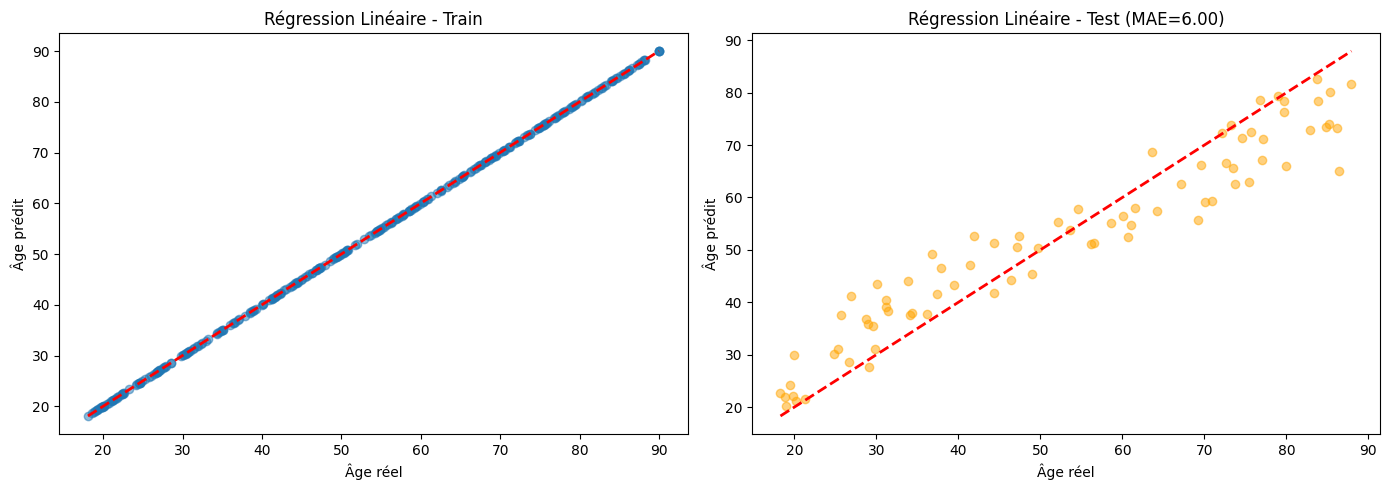

In [157]:
# 1. Régression Linéaire
lr = LinearRegression()
res_lr = evaluate_model(lr, X_train_scaled, X_test_scaled, y_train, y_test, "Régression Linéaire")


Ridge
Train - MAE: 0.002, R²: 1.000
Test  - MAE: 5.997, R²: 0.890
Corrélation test : 0.961


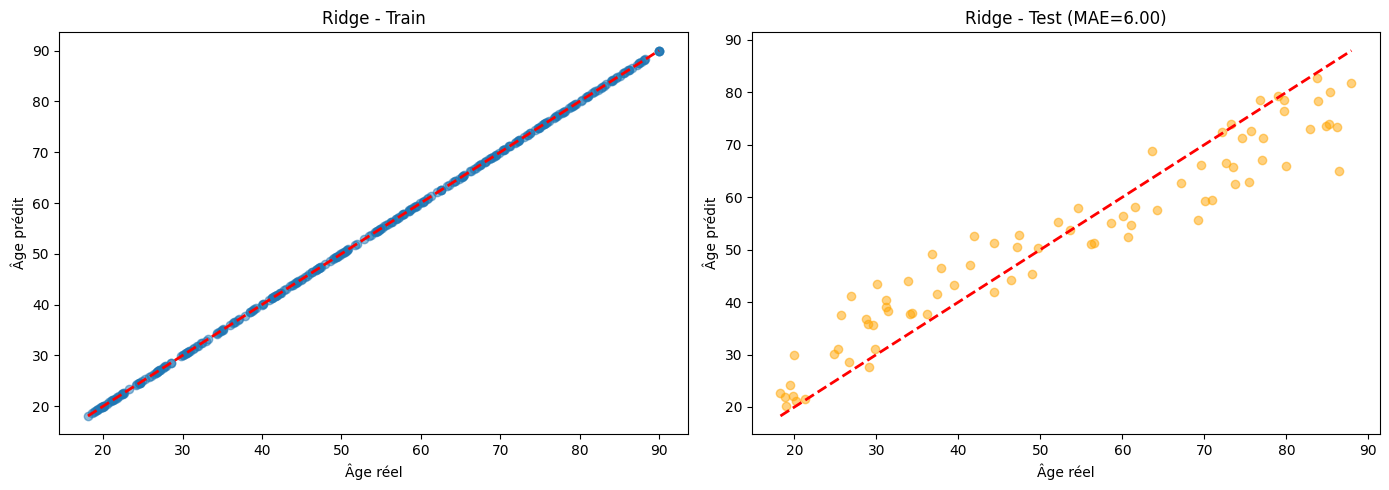

In [158]:
# 2. Ridge
ridge = Ridge(alpha=1.0, random_state=RANDOM_STATE)
res_ridge = evaluate_model(ridge, X_train_scaled, X_test_scaled, y_train, y_test, "Ridge")


Lasso
Train - MAE: 0.803, R²: 0.998
Test  - MAE: 5.871, R²: 0.905
Corrélation test : 0.954


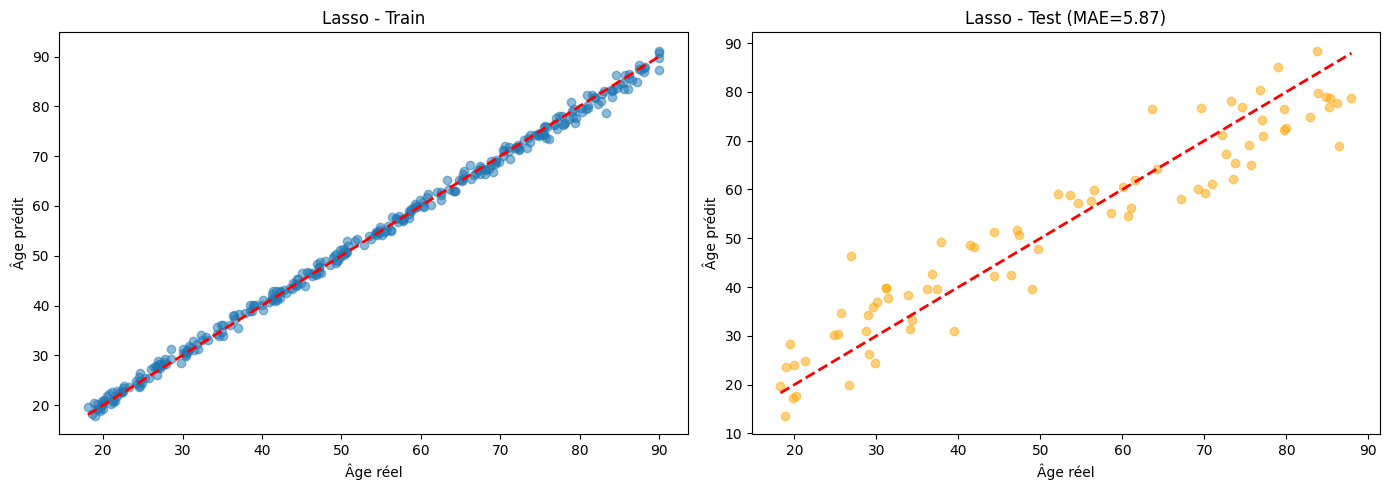

Features sélectionnées : 273/10002


In [159]:
# 3. Lasso
lasso = Lasso(alpha=0.1, random_state=RANDOM_STATE, max_iter=5000)
res_lasso = evaluate_model(lasso, X_train_scaled, X_test_scaled, y_train, y_test, "Lasso")
print(f"Features sélectionnées : {np.sum(res_lasso['model'].coef_ != 0)}/{X_train.shape[1]}")


ElasticNet
Train - MAE: 0.459, R²: 0.999
Test  - MAE: 5.593, R²: 0.909
Corrélation test : 0.958


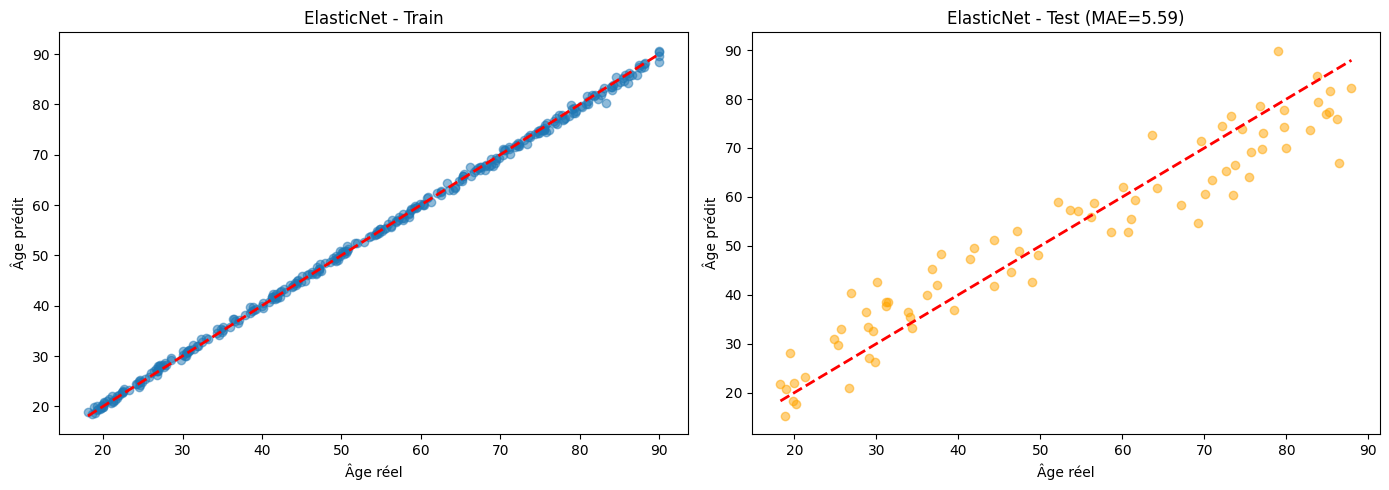

In [160]:
# 4. ElasticNet
enet = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=RANDOM_STATE, max_iter=5000)
res_enet = evaluate_model(enet, X_train_scaled, X_test_scaled, y_train, y_test, "ElasticNet")

In [161]:
print("age dans X ?", "age" in X.columns)
print("Age dans X ?", "Age" in X.columns)
print([c for c in X.columns if "age" in c.lower()][:20])
print("Colonnes non-CpG:", [c for c in X.columns if not str(c).startswith("cg")][:20])


age dans X ? False
Age dans X ? False
[]
Colonnes non-CpG: ['female', 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Declined', 'ethnicity_Hispanic', 'ethnicity_Other', 'ethnicity_Unavailable', 'ethnicity_White']


In [162]:
# =====================================================
# 1. IMPORTS
# =====================================================
import numpy as np
from scipy.stats import pearsonr

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel
from sklearn.metrics import mean_absolute_error, r2_score

# =====================================================
# 2. PARAMÈTRES
# =====================================================
N_CPGS = 65
RANDOM_STATE = 42

# =====================================================
# 3. SÉLECTION DES CpG PAR CORRÉLATION (TRAIN UNIQUEMENT)
#    (robuste aux NaN)
# =====================================================
Xtr = np.asarray(X_train_scaled)
Xte = np.asarray(X_test_scaled)
ytr = np.asarray(y_train).ravel()
yte = np.asarray(y_test).ravel()

corrs = np.zeros(Xtr.shape[1], dtype=float)

for i in range(Xtr.shape[1]):
    xi = Xtr[:, i]
    mask = np.isfinite(xi) & np.isfinite(ytr)  # enlève NaN/inf pour pearsonr

    if mask.sum() < 3:
        corrs[i] = 0.0
    else:
        r, _ = pearsonr(xi[mask], ytr[mask])
        corrs[i] = 0.0 if not np.isfinite(r) else abs(r)

selected_idx = np.argsort(corrs)[-N_CPGS:]  # top N

X_train_sel = Xtr[:, selected_idx]
X_test_sel  = Xte[:, selected_idx]

print("Nombre de CpGs sélectionnés :", X_train_sel.shape[1])

# =====================================================
# 4. GAUSSIAN PROCESS REGRESSOR (GPR)
# =====================================================
kernel = (1.0 * Matern(length_scale=1.0, nu=1.5)) + WhiteKernel(noise_level=1.0)

gp_age = GaussianProcessRegressor(
    kernel=kernel,
    alpha=1e-6,
    normalize_y=True,
    n_restarts_optimizer=10,
    random_state=RANDOM_STATE
)

# =====================================================
# 5. ENTRAÎNEMENT + ÉVALUATION (train/test)
# =====================================================
gp_age.fit(X_train_sel, ytr)

y_pred_train = gp_age.predict(X_train_sel)
y_pred_test  = gp_age.predict(X_test_sel)

mae_train = mean_absolute_error(ytr, y_pred_train)
mae_test  = mean_absolute_error(yte, y_pred_test)
r2_train  = r2_score(ytr, y_pred_train)
r2_test   = r2_score(yte, y_pred_test)

print("\n=== Résultats GPR ===")
print(f"MAE Train : {mae_train:.4f}")
print(f"MAE Test  : {mae_test:.4f}")
print(f"R² Train  : {r2_train:.4f}")
print(f"R² Test   : {r2_test:.4f}")

print("\nKernel initial :", kernel)
print("Kernel appris  :", gp_age.kernel_)

print(f"\nFeatures sélectionnées : {len(selected_idx)}/{Xtr.shape[1]}")


C:\Users\ndiay\AppData\Local\Temp\ipykernel_17812\1694135070.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(xi[mask], ytr[mask])


Nombre de CpGs sélectionnés : 65

=== Résultats GPR ===
MAE Train : 3.1583
MAE Test  : 5.5479
R² Train  : 0.9593
R² Test   : 0.8892

Kernel initial : 1**2 * Matern(length_scale=1, nu=1.5) + WhiteKernel(noise_level=1)
Kernel appris  : 1.21**2 * Matern(length_scale=27, nu=1.5) + WhiteKernel(noise_level=0.0697)

Features sélectionnées : 65/10008


In [163]:
print([name for name in globals().keys() if "train" in name.lower()])


['train_test_split', 'X_train', 'y_train', 'X_train_scaled', 'X_train_sel', 'y_pred_train', 'mae_train', 'r2_train']


Optimisation ElasticNet...


c:\Users\ndiay\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.155e+01, tolerance: 1.405e+01
  model = cd_fast.enet_coordinate_descent(


Meilleurs params : {'alpha': 0.01, 'l1_ratio': 0.3}
Score CV : 4.905 années

ElasticNet Optimisé
Train - MAE: 0.032, R²: 1.000
Test  - MAE: 5.303, R²: 0.911
Corrélation test : 0.960


c:\Users\ndiay\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.155e+01, tolerance: 1.405e+01
  model = cd_fast.enet_coordinate_descent(


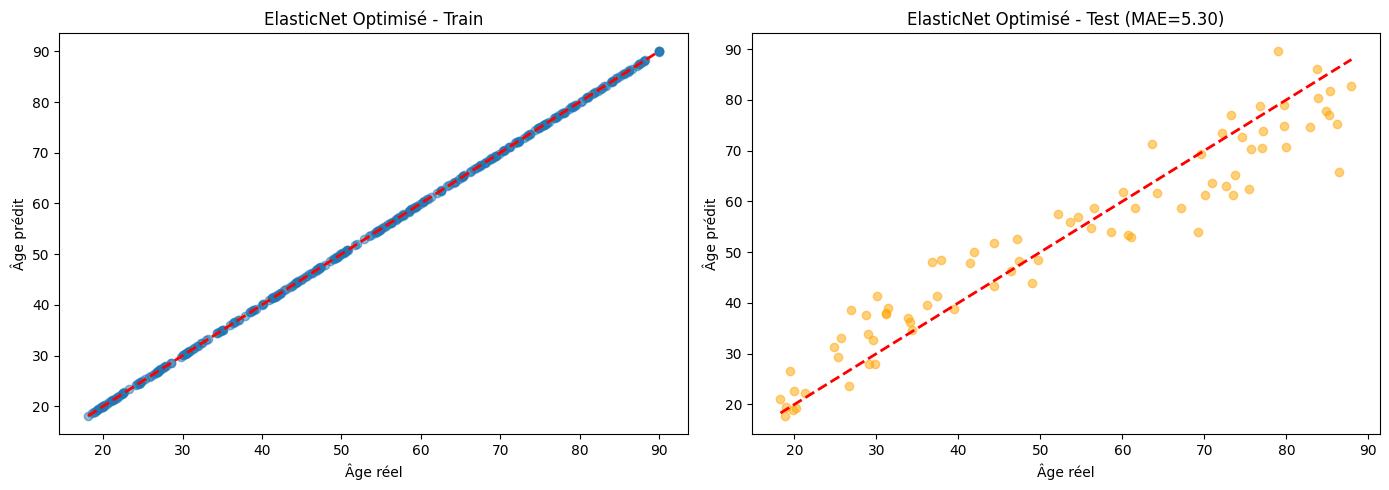

In [167]:


# 5. ElasticNet optimisé
print("Optimisation ElasticNet...")
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}
enet_cv = GridSearchCV(
    ElasticNet(random_state=RANDOM_STATE, max_iter=10000),
    param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1
)
enet_cv.fit(X_train_scaled, y_train)
print(f"Meilleurs params : {enet_cv.best_params_}")
print(f"Score CV : {-enet_cv.best_score_:.3f} années")

res_enet_opt = evaluate_model(enet_cv.best_estimator_, X_train_scaled, X_test_scaled, 
                               y_train, y_test, "ElasticNet Optimisé")

In [171]:
from sklearn.utils.validation import check_is_fitted

try:
    check_is_fitted(enet)
    print("✅ enet est déjà fit")
except Exception as e:
    print("❌ enet pas fit :", e)


❌ enet pas fit : This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.


In [172]:
# Refit du pipeline
enet.fit(X_train, y_train)

# Prédiction
y_pred = enet.predict(X_test)

print("Best alpha:", enet.named_steps["enet"].alpha_)
print("Best l1_ratio:", enet.named_steps["enet"].l1_ratio_)


ValueError: could not convert string to float: 'Hispanic'

In [168]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

def corr(y_true, y_pred):
    return np.corrcoef(y_true, y_pred)[0, 1]

# --- ElasticNet OPT (ElasticNetCV pipeline) ---
y_pred = enet.predict(X_test)

res_enet_opt = {
    "test_mae": mean_absolute_error(y_test, y_pred),
    "test_r2":  r2_score(y_test, y_pred),
    "test_corr": corr(y_test, y_pred)
}

print(res_enet_opt)


NotFittedError: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [169]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

# Colonnes
cpg_cols = [c for c in X_train.columns if str(c).startswith("cg")]
cat_cols = ["ethnicity"]
num_extra = ["female"]

preprocess = ColumnTransformer(
    transformers=[
        ("cpg", "passthrough", cpg_cols),  # PAS besoin de scaler pour arbres
        ("num", "passthrough", num_extra),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ],
    remainder="drop"
)

gb = Pipeline([
    ("prep", preprocess),
    ("model", GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=RANDOM_STATE
    ))
])

res_gb = evaluate_model(gb, X_train, X_test, y_train, y_test, "Gradient Boosting")


ValueError: Input X contains NaN.
GradientBoostingRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## 4. Comparaison des modèles

In [ ]:
comparison = pd.DataFrame({
    'Modèle': ['Régression Linéaire', 'Ridge', 'Lasso', 'ElasticNet', 'ElasticNet Opt', 'Random Forest', 'Gradient Boosting'],
    'MAE Test': [res_lr['test_mae'], res_ridge['test_mae'], res_lasso['test_mae'], 
                 res_enet['test_mae'], res_enet_opt['test_mae'], res_rf['test_mae'], res_gb['test_mae']],
    'R² Test': [res_lr['test_r2'], res_ridge['test_r2'], res_lasso['test_r2'], 
                res_enet['test_r2'], res_enet_opt['test_r2'], res_rf['test_r2'], res_gb['test_r2']],
    'Corrélation': [res_lr['test_corr'], res_ridge['test_corr'], res_lasso['test_corr'], 
                    res_enet['test_corr'], res_enet_opt['test_corr'], res_rf['test_corr'], res_gb['test_corr']]
}).sort_values('MAE Test')

print("\n" + "="*80)
print("COMPARAISON DES MODÈLES")
print("="*80)
print(comparison.to_string(index=False))
print("="*80)


COMPARAISON DES MODÈLES
             Modèle  MAE Test  R² Test  Corrélation
     ElasticNet Opt  5.338775 0.911997     0.959945
         ElasticNet  5.592669 0.908692     0.958268
              Lasso  5.871110 0.905178     0.954280
Régression Linéaire  5.996587 0.890381     0.960572
              Ridge  5.997242 0.890365     0.960570
      Random Forest  7.633723 0.814101     0.922542
  Gradient Boosting  7.761727 0.807879     0.905344


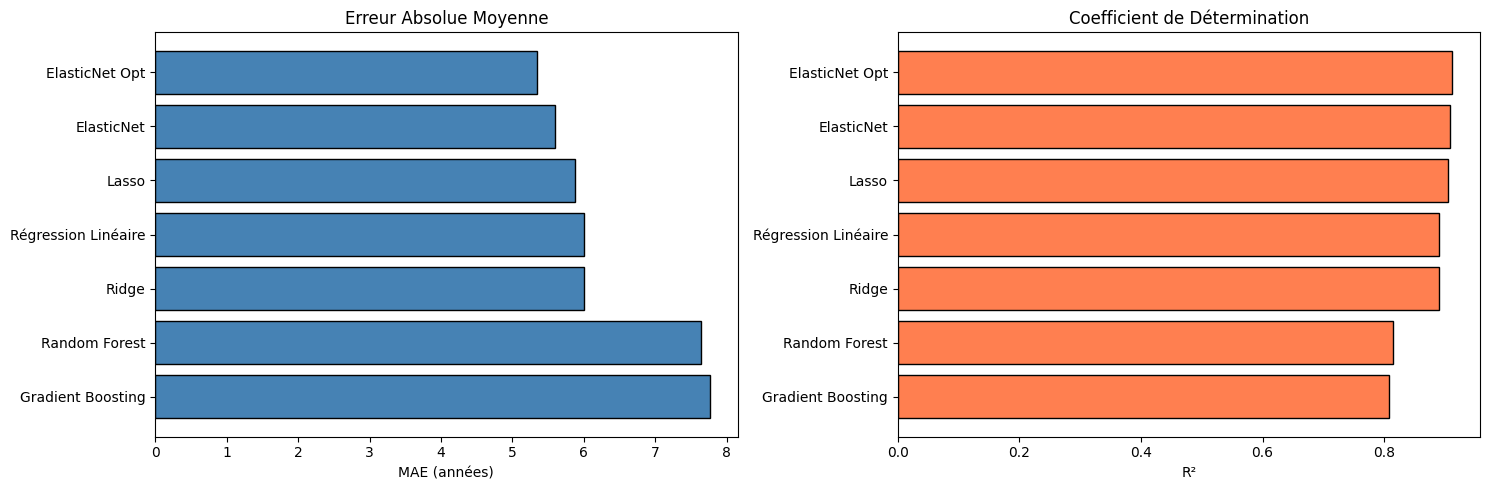

In [ ]:
# Visualisation comparative
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].barh(comparison['Modèle'], comparison['MAE Test'], color='steelblue', edgecolor='black')
axes[0].set_xlabel('MAE (années)')
axes[0].set_title('Erreur Absolue Moyenne')
axes[0].invert_yaxis()

axes[1].barh(comparison['Modèle'], comparison['R² Test'], color='coral', edgecolor='black')
axes[1].set_xlabel('R²')
axes[1].set_title('Coefficient de Détermination')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

## 5. Analyse du meilleur modèle

In [ ]:
best_name = comparison.iloc[0]['Modèle']
print(f"🏆 Meilleur modèle : {best_name}")
print(f"   MAE : {comparison.iloc[0]['MAE Test']:.3f} années")
print(f"   R² : {comparison.iloc[0]['R² Test']:.3f}")

🏆 Meilleur modèle : ElasticNet Opt
   MAE : 5.339 années
   R² : 0.912


In [ ]:
# Récupérer le modèle interne
enet_model = enet.named_steps["enet"]

# Récupérer les noms transformés
feature_names = enet.named_steps["prep"].get_feature_names_out()

coefs = enet_model.coef_

print("Nb features modèle :", len(coefs))
print("Nb feature names  :", len(feature_names))

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coef": coefs
})

# enlever coef = 0
coef_df = coef_df[coef_df["Coef"] != 0].copy()

top_pos = coef_df.sort_values("Coef", ascending=False).head(10)
top_neg = coef_df.sort_values("Coef").head(10)

print("\nTop 10 vieillissement (coef +) :")
print(top_pos.to_string(index=False))

print("\nTop 10 jeunesse (coef -) :")
print(top_neg.to_string(index=False))

print("\nBest alpha:", enet_model.alpha_)
print("Best l1_ratio:", enet_model.l1_ratio_)


Nb features modèle : 10009
Nb feature names  : 10009

Top 10 vieillissement (coef +) :
        Feature     Coef
cpg__cg00059225 0.654074
cpg__cg00001583 0.633022
cpg__cg00184376 0.475055
cpg__cg00145253 0.472730
cpg__cg00138101 0.459972
cpg__cg00008033 0.438653
cpg__cg00086871 0.432502
cpg__cg00058879 0.419150
cpg__cg00178249 0.412407
cpg__cg00000596 0.397971

Top 10 jeunesse (coef -) :
        Feature      Coef
cpg__cg00086189 -0.656895
cpg__cg00215887 -0.618167
cpg__cg00046877 -0.587016
cpg__cg00189689 -0.542099
cpg__cg00243594 -0.512479
cpg__cg00211944 -0.492853
cpg__cg00178850 -0.438498
cpg__cg00170483 -0.435545
cpg__cg00164847 -0.421784
cpg__cg00115460 -0.417536

Best alpha: 0.01
Best l1_ratio: 0.3


## 6. Age Acceleration

AGE ACCELERATION
Moyenne : -0.349 ans
Médiane : 0.095 ans
Std : 6.580 ans
Range : [-19.47, 11.80]


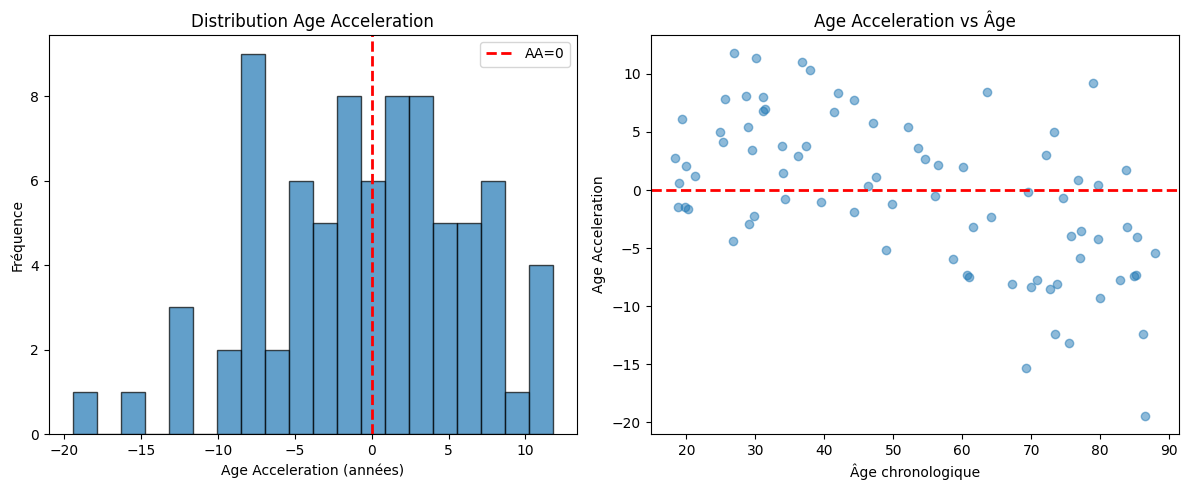

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- PREDICTION (modèle ElasticNetCV dans le pipeline) ---
y_pred = enet.predict(X_test)

age_accel = y_pred - y_test.to_numpy()

print("AGE ACCELERATION")
print(f"Moyenne : {age_accel.mean():.3f} ans")
print(f"Médiane : {np.median(age_accel):.3f} ans")
print(f"Std : {age_accel.std():.3f} ans")
print(f"Range : [{age_accel.min():.2f}, {age_accel.max():.2f}]")

# --- PLOTS ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(age_accel, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', lw=2, label='AA=0')
plt.xlabel('Age Acceleration (années)')
plt.ylabel('Fréquence')
plt.title('Distribution Age Acceleration')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, age_accel, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Âge chronologique')
plt.ylabel('Age Acceleration')
plt.title('Age Acceleration vs Âge')

plt.tight_layout()
plt.show()


## 7. Sauvegarde

In [ ]:
import pickle

# enet = Pipeline([("scaler", ...), ("enet", ElasticNetCV(...))])  <-- ton modèle optimisé qui a fit()

with open("best_model.pkl", "wb") as f:
    pickle.dump(enet, f)

# Si tu as déjà "comparison" :
comparison.to_csv("results_comparison.csv", index=False)

print("✓ Modèle (pipeline) et résultats sauvegardés")


✓ Modèle (pipeline) et résultats sauvegardés
